In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(3476, 1792)


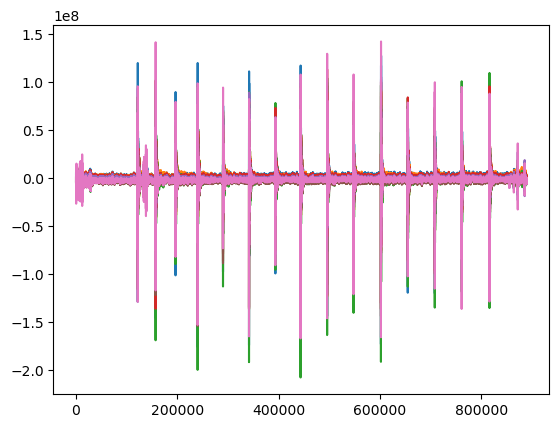

In [50]:
audio_data = np.genfromtxt("data_collection/audiotest2/Audio_Log.csv", delimiter=',')
print(audio_data.shape)

# create 7 lists, one for each channel
channel_audio = [[] for _ in range(0, 7)]
# there are 256 samples per channel, per period (row?)
for row in audio_data:
  block_num = 0
  while block_num < 256:
    for i in range(0, 7):
      channel_audio[i].append(row[(block_num * 7) + i])
    block_num += 1
block_num = 0
for i in channel_audio:
  # plt.plot(i[317200:317500])
  plt.plot(i)
plt.show()

# print(len(channel_audio[0]))

# channel_audio = [[] for _ in range(0, 7)]
# while block_num < 256:
#     for i in range(0, 7):
#       channel_audio[i].append(audio_data[0][(block_num * 7) + i])
#     block_num += 1

# for i in channel_audio:
#   plt.plot(i)
# plt.show()

# print(len(channel_audio[0]))

In [62]:
from scipy.io.wavfile import write

# Parameters
sample_rate = 48000  # Sampling rate in Hz
file_name = "output_audio.wav"
audio_array = np.array(channel_audio).T
for a in audio_array:
  a = a.astype(np.int16)
# Save as WAV file
write(file_name, sample_rate, audio_array)
print(f"Saved WAV file: {file_name}")



Saved WAV file: output_audio.wav
